# Global Power Plant Database
## Problem Statement:
### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

##### Key attributes of the database
##### The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


## Fuel Type Aggregation
### We define the "Fuel Type" attribute of our database based on common fuel categories. 

## Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

____

# Importing the libraries

In [335]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset


In [341]:

df = pd.read_csv("D:/Global_PowerPlant.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


### Shape of the dataset

#### The dataset appears to have a total of 908 reciords and 25 columns including 2 target column

In [3]:
df.shape

(908, 25)

# Preporcessing

### The dataset appears to have missing values in couple of columns


### We have 13 float type records and 12 object type records

### The target variable "primary_fuel" is categorical and "capacity_mw" has continous variable

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 907
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             890 non-null    int32  
 1   country_long        890 non-null    int32  
 2   name                890 non-null    int32  
 3   gppd_idnr           890 non-null    int32  
 4   capacity_mw         890 non-null    float64
 5   primary_fuel        890 non-null    int32  
 6   source              890 non-null    int32  
 7   url                 890 non-null    int32  
 8   geolocation_source  890 non-null    int32  
dtypes: float64(1), int32(8)
memory usage: 41.7 KB


<AxesSubplot:>

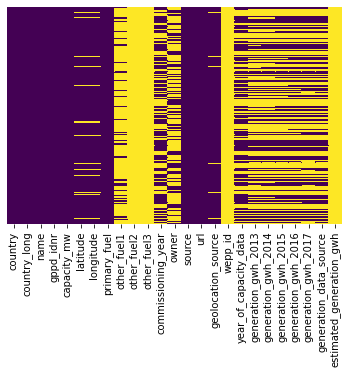

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### Missing value percentages

#### We can see we have multiple missing values for tyhe columns as shown below.

#### We will keep the features if we can or if it's helpful in the model building

In [14]:
df.isnull().sum()/df.shape[0]*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
url                           0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

### Drop columns that are not relevant

#### The following columns have a lot of missing data and by filling the data the model didn't get good acuracy / score

In [372]:
df.drop(columns = ["other_fuel1", "other_fuel2", "other_fuel3", "commissioning_year", "owner", "wepp_id", "year_of_capacity_data",
                  "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
                   "estimated_generation_gwh", "generation_data_source"], axis=1, inplace=True)

#### Dropping these columns as unable to replace latitude and longitude with mean or mode as it should be accurate.



In [373]:
df.drop(columns = ["latitude", "longitude"], axis=1, inplace=True)

#### Check for null values if any

In [231]:
df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

### Let us proceed to fill the missing values

#### We are going to fill all categorical missing values with the mode and all continous missing values with the mean

In [232]:
# filling these continous values using mode

df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])


#### Lets plot a heatmap to identify if any null values after the previous step

<AxesSubplot:>

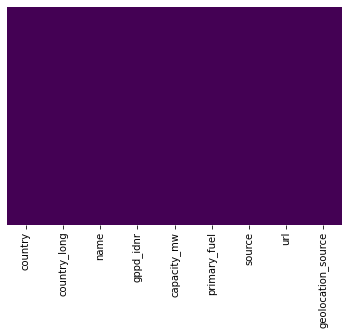

In [233]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

##### We can see the columns "W",  "3B", "SB", "CG", "SHO" have more deviation than the other columns as the difference between the mean and std is high compared to other columns.

##### We can also see there are some outliers and its evident in the coumns "H", "HR", "BB",  "SO", "SB", "RA", "ER", "CG", "SHO", "E".

##### We will try to reduce the outliers in the further steps

In [16]:
df.describe()

,capacity_mw,latitude,longitude
count,908.000000,862.000000,862.000000
mean,321.046378,21.196189,77.447848
std,580.221767,6.248627,4.907260
min,0.000000,8.168900,68.644700
25%,16.837500,16.771575,74.258975
50%,60.000000,21.778300,76.719250
75%,388.125000,25.516375,79.441475
max,4760.000000,34.649000,95.408000


# Lets plot a couple of plots for further understanding

#### We can see from the below plot, the majority of the fuel type the retailers deal with is "coal"

#### We can also see "Hydro" fuel type is also catching upto "coal". Hydrogen is available in abundance and is used to create clean fuel using water which is less harmful to the environment unlike coal industries.

#### It is obvious that the "nuclear" fuel type consumption is less. In India not all industries get licencing to handle "nuclear" fuel which involves the use of "Uranium"

#### It appears majority of companies are gradually switching to different fuel type especially "hydro" fuels

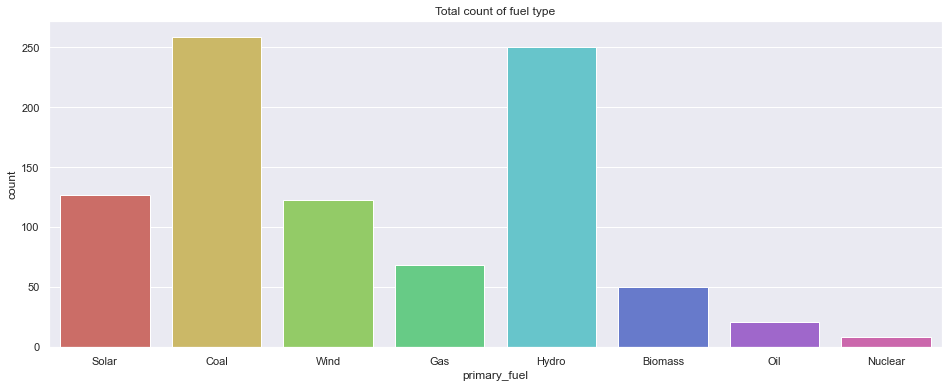

In [344]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="primary_fuel", data=df, palette="hls").set(title='Total count of fuel type')

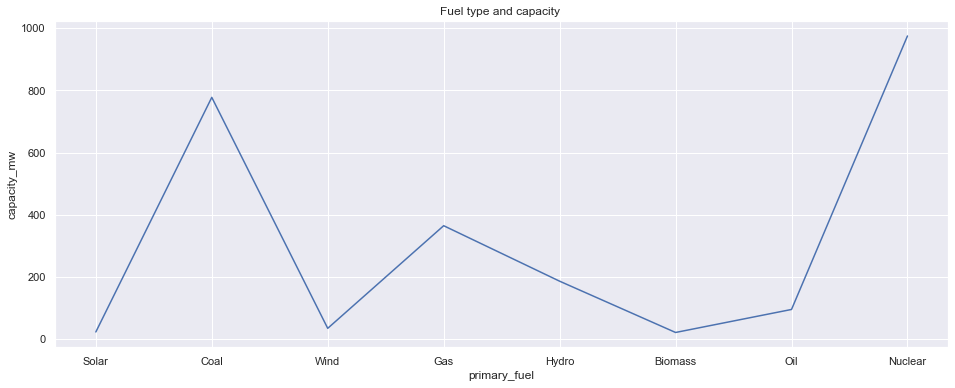

In [349]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="primary_fuel", y="capacity_mw", ci=None).set(title='Fuel type and capacity ')
plt.show()

#### From the below plot we can see there are 3 major players in this sector and "WRI" (World Resources Institue) seems to be a key player compared to other dealers

#### We have very few dealers in this sector and usually government undertakes such profiles to reduce monopoly and privatization completely

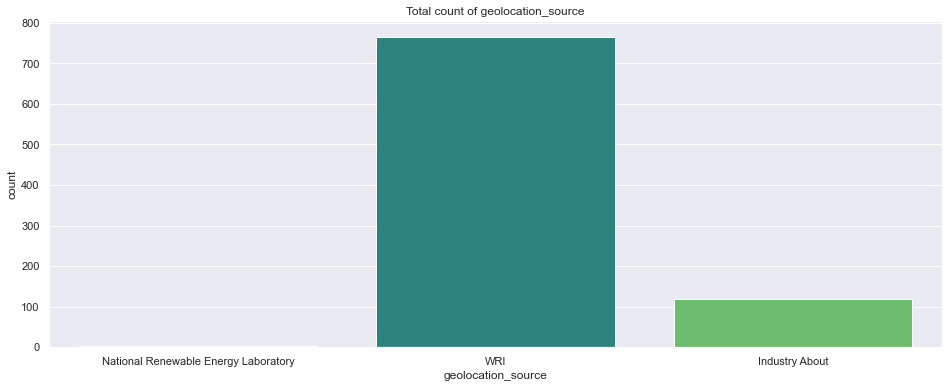

In [353]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="geolocation_source", data=df, palette="viridis").set(title='Total count of geolocation_source')

#### We can see we have a lot of  missing data for this feature

#### We can also see "Central Electricity Authority" seems to be one of the biggest bidder and provider of "Hydro" fuel

#### We observed in the previous plots "Hydro" fuel seems to be the new relacement to current fuel industry as it has multiple applications and also benefits for the environment


#### We do have some players for other fuel type source but since the data is missing we cannot assume anything

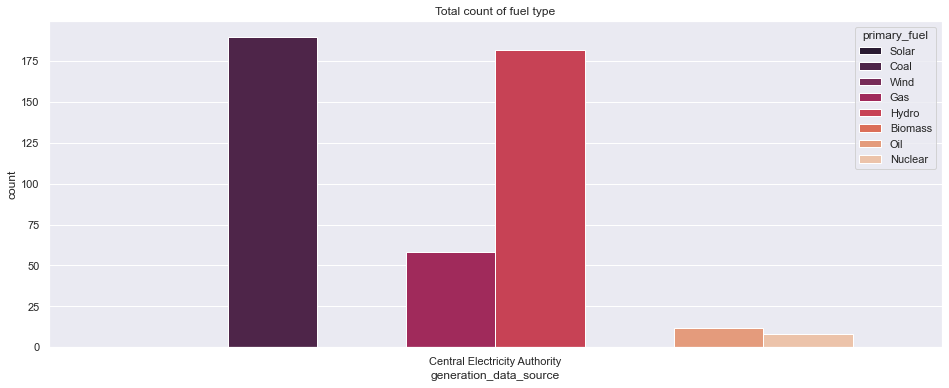

In [352]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="generation_data_source", data=df, palette="rocket", hue="primary_fuel").set(title='Total count of fuel type')


#### From the below plot we can see although these is missing data for couple of years

#### It appears the capacity of the fuel type is increased considerably from the year 1940 to 2020

#### We can also see there was sudden surge in capacity in the late 1965 and 1970's


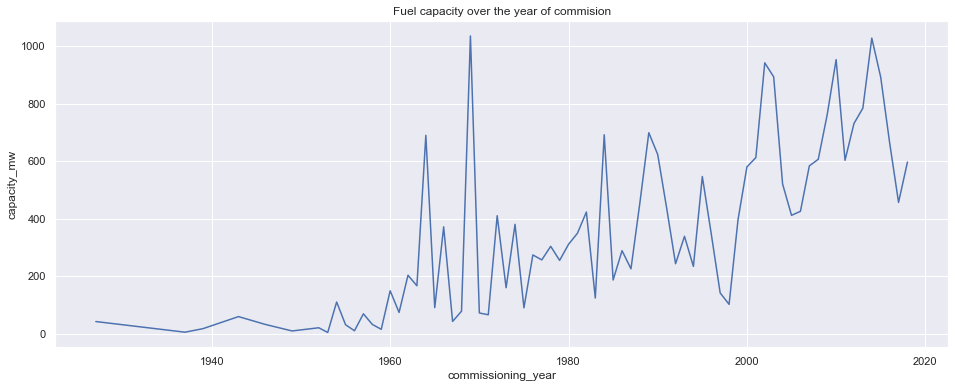

In [366]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="commissioning_year", y="capacity_mw", ci=None).set(title='Fuel capacity over the year of commision')
plt.show()

#### From the below plot we can see that although "Hydro" fuels is gaining more importance and is on par with "coal" industries.

#### It appears a lot of investment may have been put into "Solar" and it did not gain that much popularity.

#### As per scientific conclusion, we use only 2% of energy we recieve in the form of solar as we don't have enough technology to harness it completey and effectively

#### we can also see the "Hydro" fuels had no demand at all back in 1990's and it show's how it got such populatity

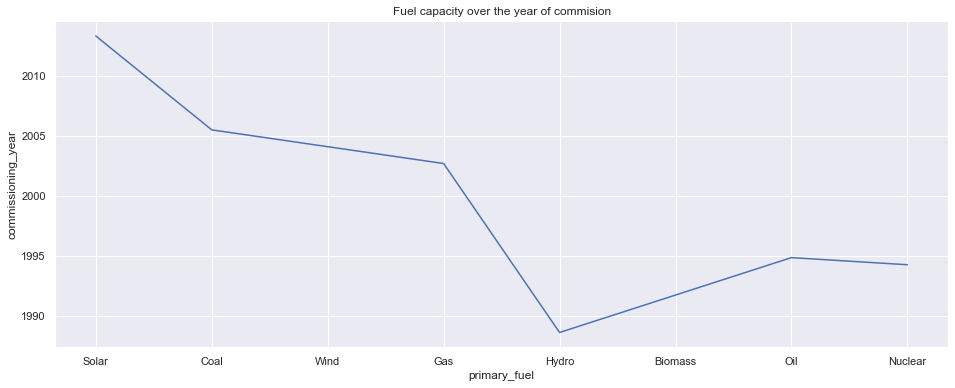

In [370]:

plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="primary_fuel", y="commissioning_year", ci=None).set(title='Fuel capacity over the year of commision')
plt.show()

# Preprocessing

### Encoding the dataset
##### I have used LabelEncoder as the data is categorical and is not ordinal in nature.
##### All the columns are encoded except for "capacity_mw"

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             908 non-null    object 
 1   country_long        908 non-null    object 
 2   name                908 non-null    object 
 3   gppd_idnr           908 non-null    object 
 4   capacity_mw         908 non-null    float64
 5   primary_fuel        908 non-null    object 
 6   source              908 non-null    object 
 7   url                 908 non-null    object 
 8   geolocation_source  889 non-null    object 
dtypes: float64(1), object(8)
memory usage: 64.0+ KB


In [234]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'primary_fuel', 'source', 'url', 'geolocation_source'],
      dtype='object')

In [378]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [379]:
df_new1 = lab_enc.fit_transform(df["country"])
df_new2 = lab_enc.fit_transform(df["country_long"])
df_new3 = lab_enc.fit_transform(df["name"])
df_new4 = lab_enc.fit_transform(df["gppd_idnr"])
df_new5 = lab_enc.fit_transform(df["primary_fuel"])
df_new6 = lab_enc.fit_transform(df["source"])
df_new7 = lab_enc.fit_transform(df["url"])
df_new8 = lab_enc.fit_transform(df["geolocation_source"])

In [380]:
df["country"] = df_new1
df["country_long"] = df_new2
df["name"] = df_new3
df["gppd_idnr"] = df_new4
df["primary_fuel"] = df_new5
df["source"] = df_new6
df["url"] = df_new7
df["geolocation_source"] = df_new8

In [381]:
df

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source,url,geolocation_source
0,0,0,0,658,2.5,6,109,128,1
1,0,0,1,520,98.0,1,174,173,2
2,0,0,2,854,39.2,7,21,205,2
3,0,0,3,0,135.0,2,22,58,2
4,0,0,4,1,1800.0,1,22,58,2
...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,1,22,58,2
904,0,0,904,823,3.0,6,77,22,0
905,0,0,905,892,25.5,7,21,260,2
906,0,0,906,540,80.0,1,59,82,2


In [382]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source,url,geolocation_source
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,0.0,0.0,453.50000,453.50000,321.046378,3.205947,43.823789,94.429515,1.754405
std,0.0,0.0,262.26132,262.26132,580.221767,2.281339,44.624092,70.352824,0.699844
min,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.75000,226.75000,16.837500,1.000000,22.000000,58.000000,2.000000
50%,0.0,0.0,453.50000,453.50000,60.000000,3.000000,22.000000,58.000000,2.000000
75%,0.0,0.0,680.25000,680.25000,388.125000,6.000000,29.250000,115.250000,2.000000
max,0.0,0.0,907.00000,907.00000,4760.000000,7.000000,190.000000,303.000000,3.000000


In [383]:
df.shape

(908, 9)

# Distribution of all the columns in the dataset


### All the features seem to be a little less normal distributed. So let us try to identify and remove outliers to check if the output can be imporved

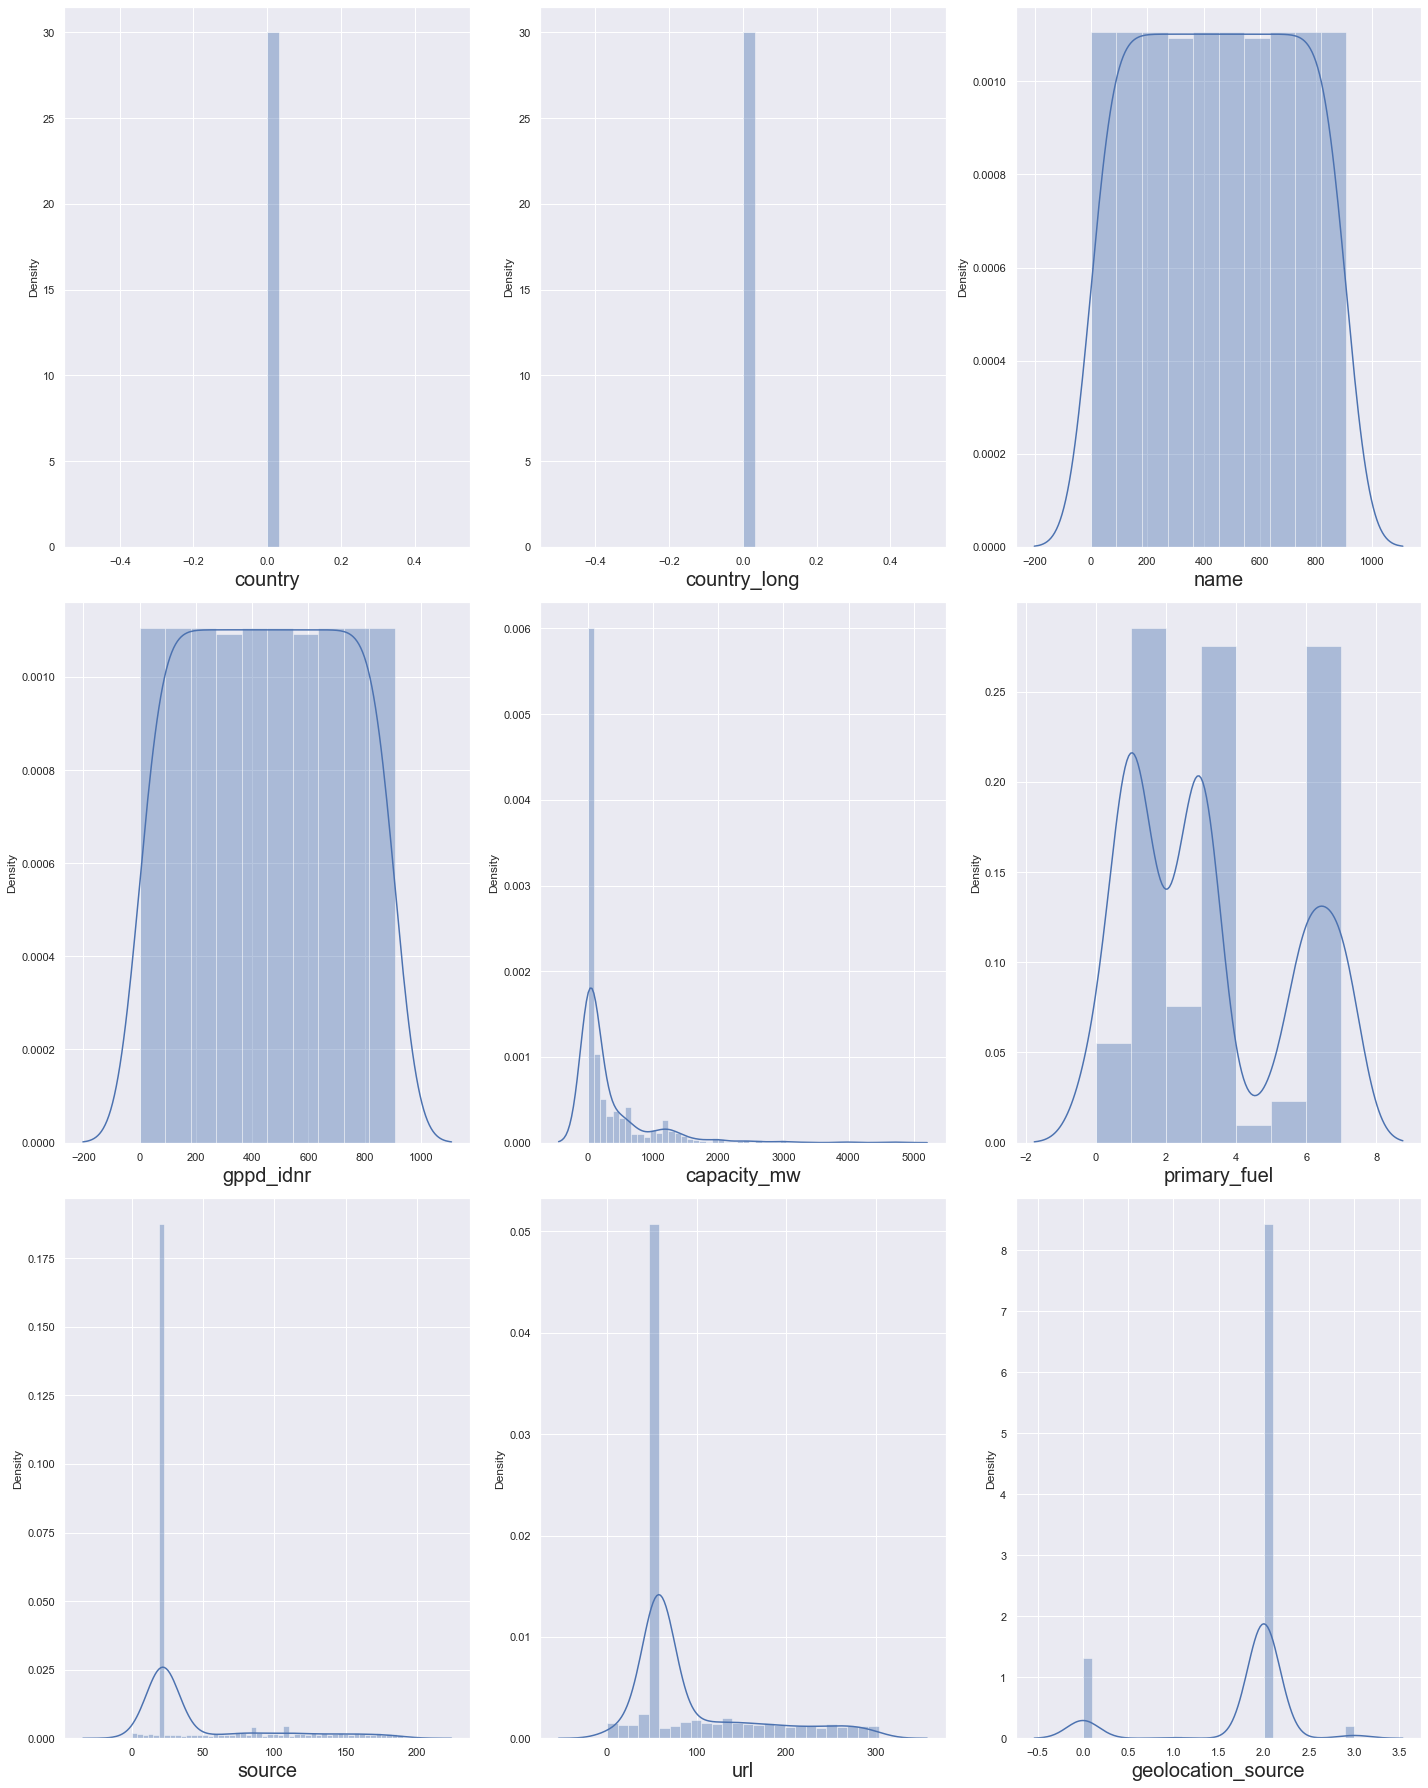

In [384]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Identifying the column names to pass it for outlier removal

In [385]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'primary_fuel', 'source', 'url', 'geolocation_source'],
      dtype='object')

# Applying Z-score to identify and remove outliers

### It appears the dataset has removed / reduced outliers to some extent

### The stats show reduction of total values in the dataset to minimal extent only

#### We can still see outliers in columns "capacity_mw" but overall the difference between mean and std looks fine.

#### Also the values of Quartiles appears to gradually increase which looks fine 

In [241]:
from scipy.stats import zscore

z_score = zscore(df[['capacity_mw']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source,url,geolocation_source
count,890.0,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,0.0,0.0,452.277528,456.735955,266.494507,3.250562,44.265169,95.166292,1.728090
std,0.0,0.0,262.466758,263.135782,425.249135,2.282403,44.964321,70.868336,0.682579
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,225.250000,228.250000,16.500000,1.000000,22.000000,58.000000,2.000000
50%,0.0,0.0,451.500000,460.500000,51.750000,3.000000,22.000000,58.000000,2.000000
75%,0.0,0.0,678.750000,684.750000,313.750000,6.000000,33.750000,117.000000,2.000000
max,0.0,0.0,907.000000,907.000000,2000.000000,7.000000,190.000000,303.000000,2.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case its approximately 3.33 % and not much of data is lost

In [386]:
# Percentage data loss:

loss_percent = (908-890)/908*100
print(loss_percent)

1.9823788546255507


# Distribution of all the columns in the dataset (post z-score)

#### The dataset appears to be slightly normally distributed than before.

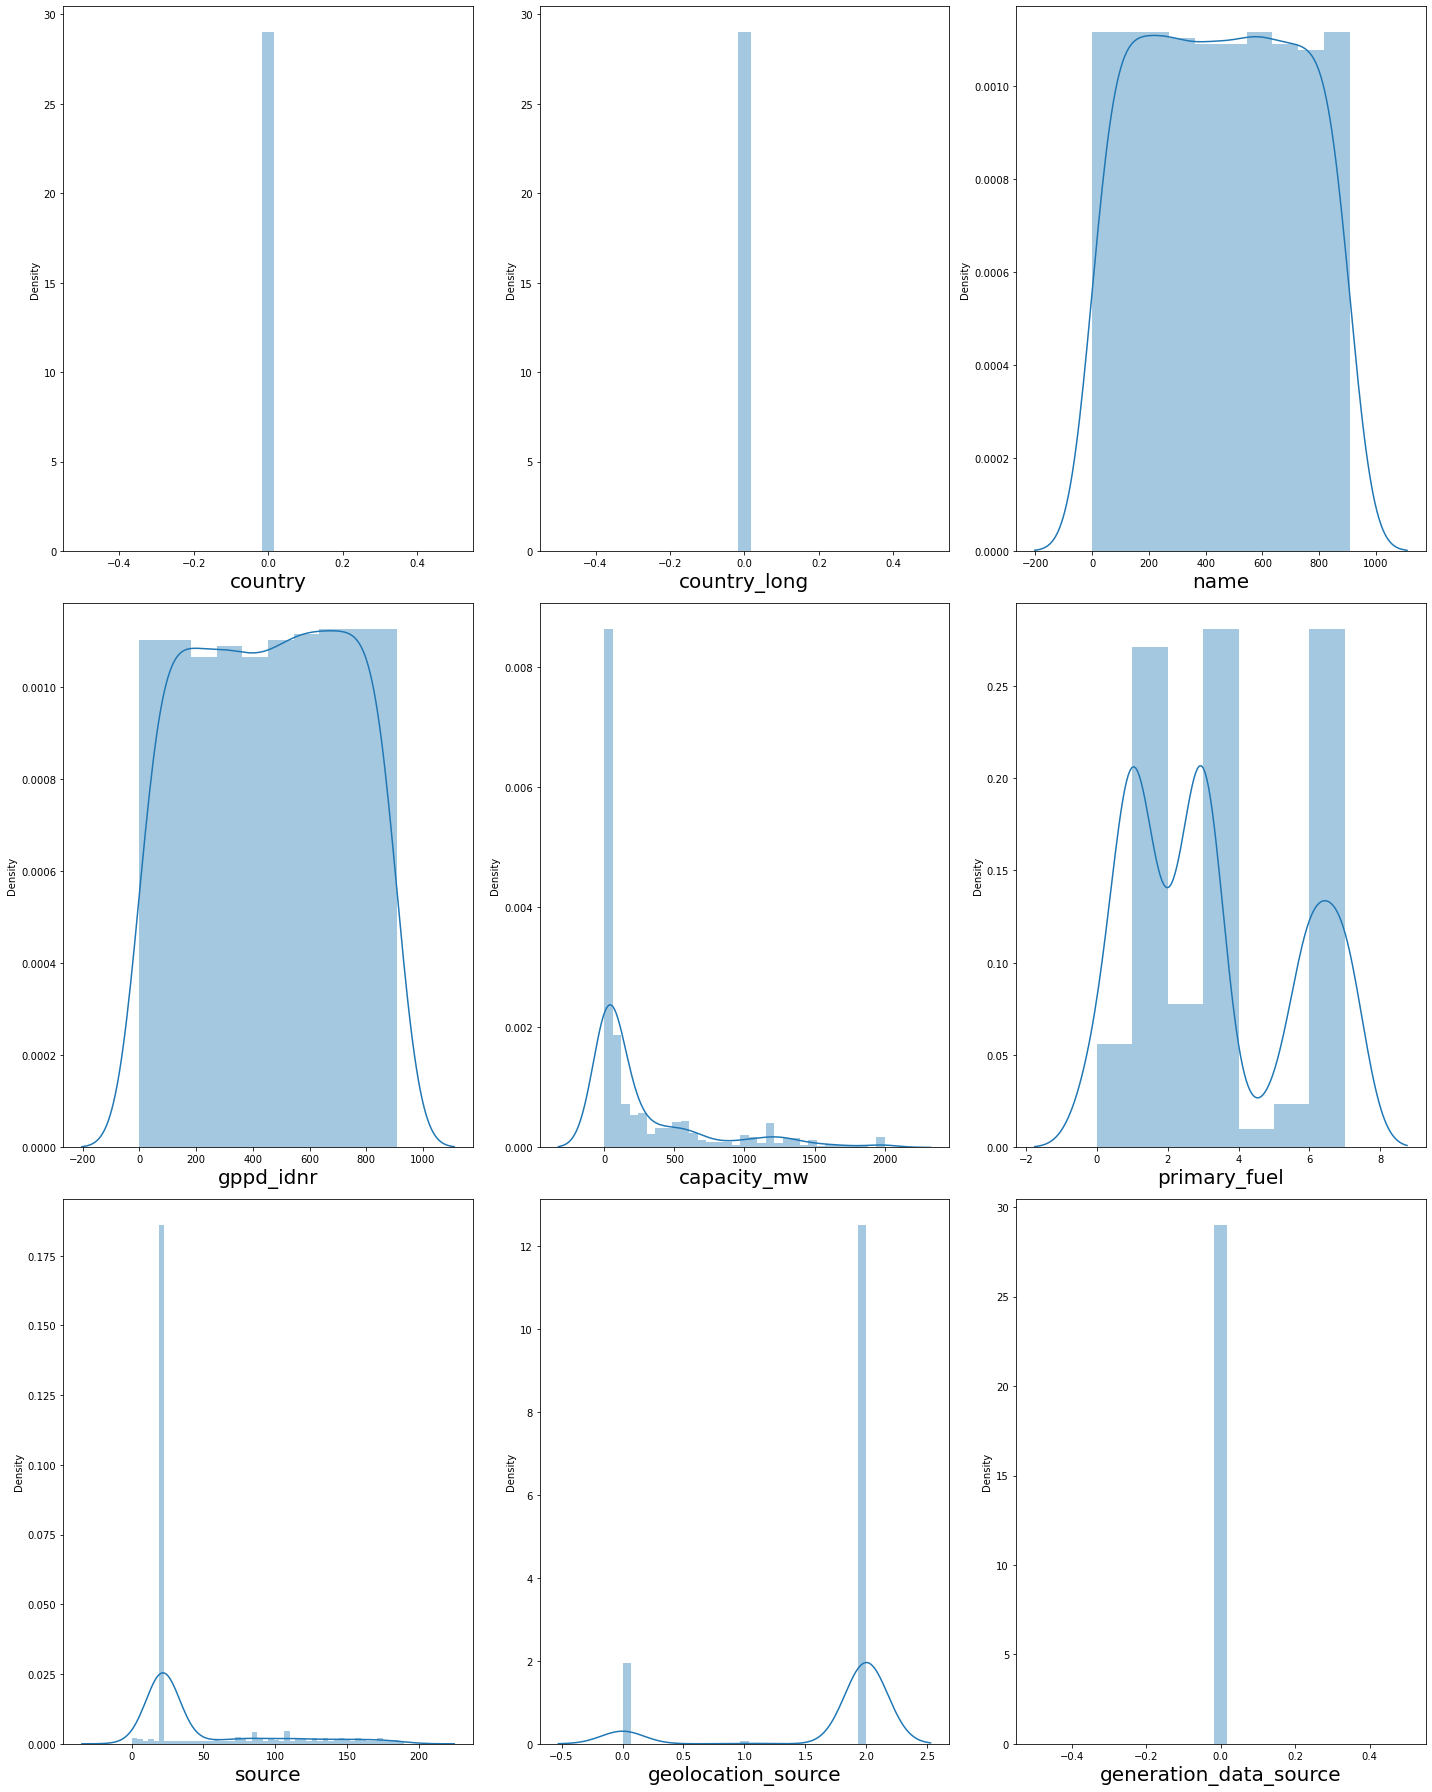

In [43]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "primary_fuel" and "capacity_mw"

In [387]:
corr_matrix = df.corr()
corr_matrix[["primary_fuel","capacity_mw"]]

,primary_fuel,capacity_mw
country,NaN,NaN
country_long,NaN,NaN
name,0.038752,0.059870
gppd_idnr,0.607373,-0.334308
capacity_mw,-0.377783,1.000000
primary_fuel,1.000000,-0.377783
source,0.053609,-0.241701
url,0.589348,-0.243176
geolocation_source,-0.419911,0.183286


## Lets us now examine correlation using a "heatmap" for further clarification


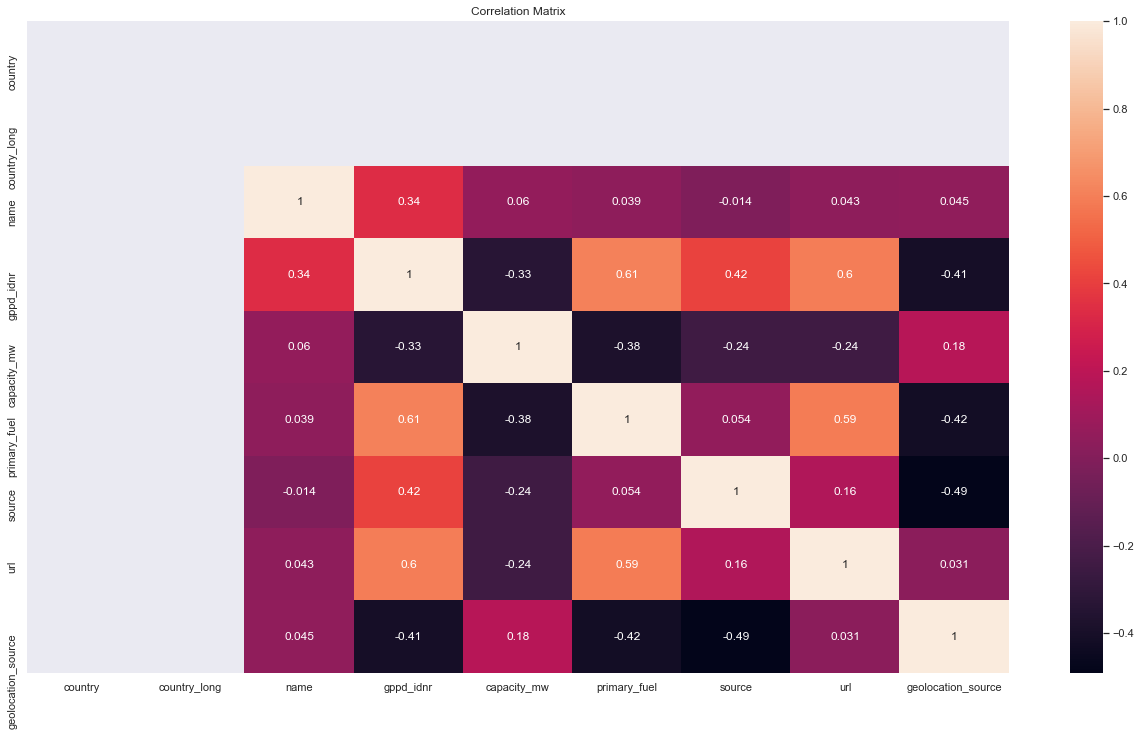

In [388]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [263]:
x = df.drop(columns = ["capacity_mw", "primary_fuel"], axis=1)

y = df[["capacity_mw", "primary_fuel"]]


### Check for skewness of data


In [266]:
x.skew()

country               0.000000
country_long          0.000000
name                  0.006801
gppd_idnr            -0.020605
source                1.797024
url                   1.481016
geolocation_source   -2.127830
dtype: float64

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [267]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Distribution after skewness is removed

#### Columns "capacity_mw" seem to have tyhe skewnes removed to some extent

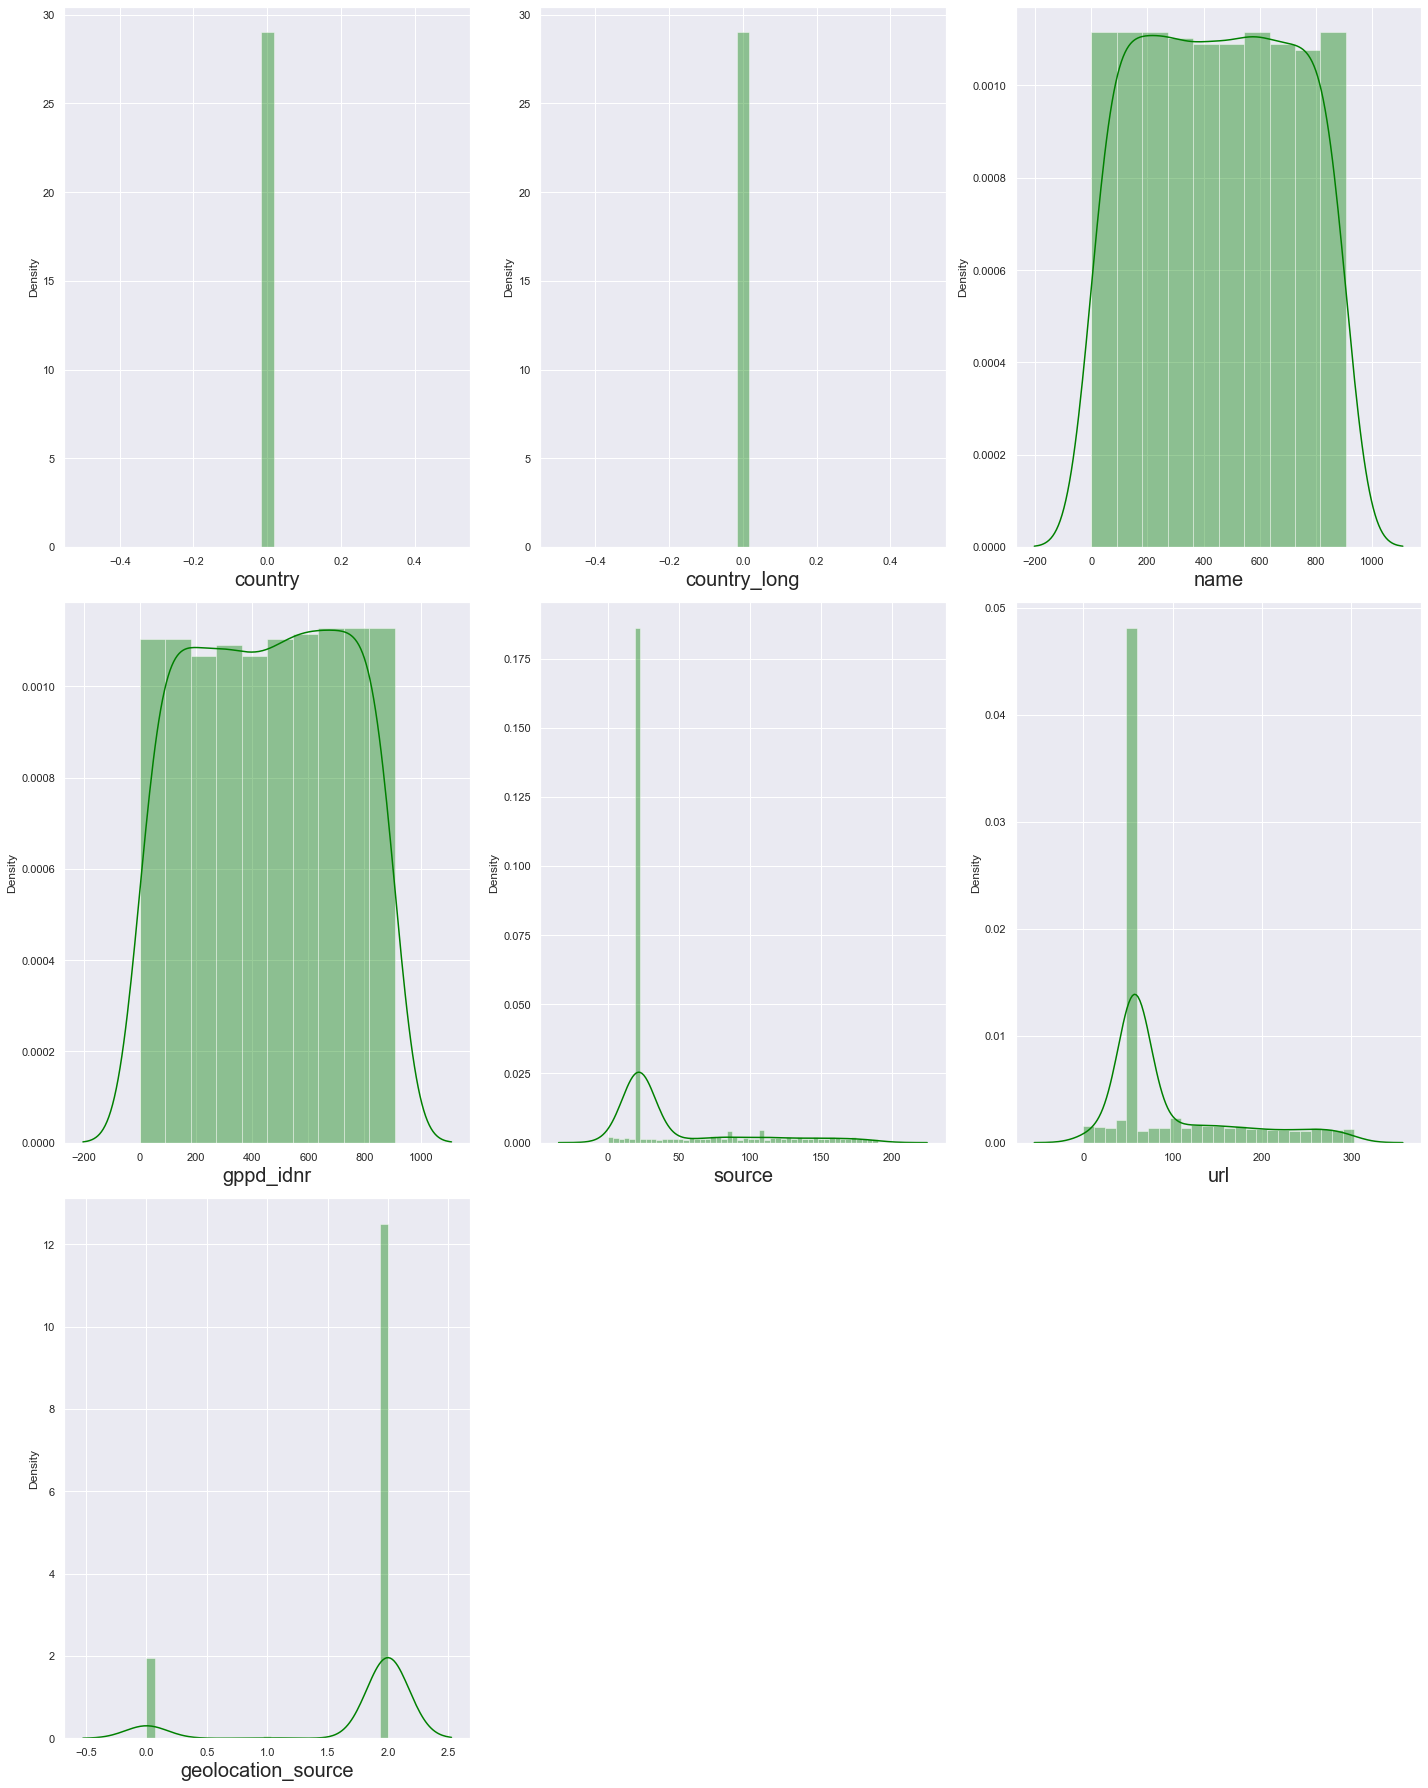

In [389]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column¶


In [268]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,NaN,country
1,NaN,country_long
2,1.335110,name
3,3.121744,gppd_idnr
4,1.433707,source
5,1.994482,url
6,1.849612,geolocation_source


# split the dataset into train and test data set

In [269]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 380)


# Building Machine Learning Models

### Create multi output regression models


### We noticed that although "primary_fuel" is classification type, by using regression model I got better accuracy / score.

### Hence for both target features "capacity_mw" and "primary_fuel" I have used regression models


### 1) DecisionTreeRegressor

In [270]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  150.59599438202247
Mean Squared Error (MSE):  135645.13213785205
Root Mean Squared Error (RMSE):  368.3003287235189


### 2) ExtraTreesRegressor

In [290]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()

extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  137.66251904494382
Mean Squared Error (MSE):  107336.1521958466
Root Mean Squared Error (RMSE):  327.6219653744947


### 3) RandomForestRegressor

In [272]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.91145049456299
Mean Absolute Error (MAE):  135.31649110486896
Mean Squared Error (MSE):  99410.5851317859
Root Mean Squared Error (RMSE):  315.29444196145596


### 4) ExtraTreeRegressor

In [273]:
from sklearn.tree import ExtraTreeRegressor

ext_tree_reg = ExtraTreeRegressor()
ext_tree_reg.fit(x_train,y_train)

y_pred = ext_tree_reg.predict(x_test)

print("Adjusted R2 squared : ",ext_tree_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  158.50294007490638
Mean Squared Error (MSE):  142411.11365238193
Root Mean Squared Error (RMSE):  377.3739705549151


### 5) KNeighborsRegressor

In [296]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh_reg = KNeighborsRegressor()
k_neigh_reg.fit(x_train,y_train)

y_pred = k_neigh_reg.predict(x_test)

print("Adjusted R2 squared : ",k_neigh_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))


Adjusted R2 squared :  0.6430484804434198
Mean Absolute Error (MAE):  131.69596367041208
Mean Squared Error (MSE):  90295.92572230138
Root Mean Squared Error (RMSE):  300.4928047762565


# Cross validation to check if its overfitting

#### We have considered 5 CV values

In [279]:
from sklearn.model_selection import cross_val_score

In [312]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: -0.3643683915828966


In [313]:
scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of ExtraTreesRegressor model is: 0.15395529535760638


In [314]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.11864743457582605


In [315]:
scr = cross_val_score(ext_tree_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreeRegressor model is:", scr.mean())

Cross Validation score of ExtraTreeRegressor model is: -0.2550684736368817


In [316]:
cr = cross_val_score(k_neigh_reg, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: -0.2550684736368817


# Selecting the best ML model for this dataset

#### From the below, it appears RandomForestRegressor better than ExtraTreesRegressor and is the appropriate algorithm for this scenario

#### The cross validation scores for all the remaining algorithms gave us a negative value which means although it has a good score, the model is not fit for this dataset as the cross validation gives the proper accuracy.


| Sr.No | Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- | --- |---|
| 1 | DecisionTreeRegressor | 100 | -0.157057048482754 | 100.157057048483 |
| 2 | ExtraTreesRegressor | 100 | 0.125024976054484 | 99.8749750239455 |
| 3 | RandomForestRegressor | 0.91145049456299 | 0.0901202571493531 | 0.821330237413637 |
| 4 | ExtraTreeRegressor | 100 | -0.0566763706760296 | 100.056676370676 |
| 5 | KNeighborsRegressor | 0.643048480443419 | -0.0566763706760296 | 0.699724851119449 |


## Hyper Parameter Tuning
#### Let us try to tune the proposed model (RandomForestRegressor) to improve the outcome
#### The "paramaters" have been selected from the skicit library and I have considered 5 paramaters

In [299]:
parameters = {"n_estimators":[10, 20, 30, 40, 50],
              "criterion":["mse", "mae"],
              "max_features":["auto", "sqrt", "log2"],
              "random_state":[10, 20, 30, 40, 50],
              "min_samples_split":[1, 2 ,3]
             }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [300]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [301]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': [10, 20, 30, 40, 50]})

In [302]:
GCV.best_params_

{'criterion': 'mae',
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 40,
 'random_state': 10}

### Rebuild the model using the appropriate params we recieved from best_params_

In [333]:
rand_mod_final = RandomForestRegressor(criterion ="mae", max_features ="auto", min_samples_split =3, n_estimators =40, random_state= 10)

rand_mod_final.fit(x_train,y_train)
pred = rand_mod_final.predict(x_test)
pred

array([[8.13100000e+01, 2.90000000e+00],
       [1.36350425e+03, 2.91250000e+00],
       [5.08500000e+01, 6.12500000e-01],
       [2.78727500e+01, 1.66250000e+00],
       [1.07543750e+01, 6.08750000e+00],
       [4.80000000e+00, 6.00000000e+00],
       [4.15167500e+02, 1.81250000e+00],
       [3.52869250e+02, 1.82500000e+00],
       [5.73350000e+01, 2.92500000e+00],
       [1.29717500e+02, 1.83750000e+00],
       [1.32648750e+02, 2.12500000e+00],
       [4.69412500e+02, 2.08750000e+00],
       [5.03825000e+01, 7.62500000e-01],
       [1.96775000e+02, 2.03750000e+00],
       [1.04582050e+03, 1.90000000e+00],
       [2.81393750e+01, 7.00000000e+00],
       [3.94125000e+02, 2.57500000e+00],
       [2.20147500e+02, 2.76250000e+00],
       [1.49756250e+02, 4.02500000e+00],
       [1.05648750e+02, 2.92500000e+00],
       [4.62196412e+02, 2.37500000e+00],
       [5.76525000e+01, 2.93750000e+00],
       [6.61205000e+02, 1.60000000e+00],
       [4.18436750e+02, 1.43750000e+00],
       [2.804275

# Saving the model (using joblib)

In [307]:
import joblib
 
joblib.dump(rand_mod_final,"Global_PowerPlant.pkl")

['Global_PowerPlant.pkl']

# Loading the saved model

In [330]:
model = joblib.load("Global_PowerPlant.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction[[1]] =  round(prediction[[1]])
prediction

,0,1
0,81.310000,3.0
1,1363.504250,3.0
2,50.850000,1.0
3,27.872750,2.0
4,10.754375,6.0
...,...,...
262,1022.380000,2.0
263,186.385000,3.0
264,477.260625,2.0
265,124.637500,3.0
